In [111]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.DataFrame(dict(age=[5, 6, np.NaN],
                   born=[pd.NaT, pd.Timestamp('1939-05-27'),
                         pd.Timestamp('1940-04-25')],
                   name=['Alfred', 'Batman', ''],
                   toy=[None, 'Batmobile', 'Joker'],
                   sex=[None, 'male', 'female'],
                   client_id=[101, 101, 102]))
df

,age,born,name,toy,sex,client_id
0,5.0,NaT,Alfred,None,None,101
1,6.0,1939-05-27,Batman,Batmobile,male,101
2,NaN,1940-04-25,,Joker,female,102


In [3]:
######################################################################################################################

In [4]:
# Сохранить в переменную текст с количеством столбцов и колонок

In [5]:
a = df.shape
b = [i for i in a]
df_shape = 'df has {} rows and {} columns'.format(b[0], b[1])

In [6]:
rows, cols = df.shape
df_shape = f'df has {rows} rows and {cols} columns'

In [7]:
######################################################################################################################

In [8]:
# Посчитать количество пропущенных значений

In [9]:
df.isna().sum()

age          1
born         1
name         0
toy          1
sex          1
client_id    0
dtype: int64

In [10]:
######################################################################################################################

In [11]:
# Сохранить типы значений в переменную

In [12]:
df_types = df.dtypes
df_types

age                 float64
born         datetime64[ns]
name                 object
toy                  object
sex                  object
client_id             int64
dtype: object

In [13]:
######################################################################################################################

In [14]:
# Сменить тип у колонки age

In [15]:
# df['age'] = df.age.astype('int')

In [16]:
######################################################################################################################

In [17]:
# Удалить колонки age и sex

In [18]:
df = df.drop(['age','sex'], axis=1)
df

,born,name,toy,client_id
0,NaT,Alfred,None,101
1,1939-05-27,Batman,Batmobile,101
2,1940-04-25,,Joker,102


In [19]:
######################################################################################################################

In [20]:
# Удалить дубликаты

In [21]:
df.drop_duplicates(subset='client_id')

,born,name,toy,client_id
0,NaT,Alfred,None,101
2,1940-04-25,,Joker,102


In [22]:
######################################################################################################################

In [23]:
# Добавить в список положительные числа

In [24]:
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers = []

for i in numbers:
    if i > 0:
        positive_numbers.append(i)
    if i == 0:
        break

In [25]:
positive_numbers

[1, 3]

In [26]:
######################################################################################################################

In [27]:
# Прочитать csv, а затем приведите столбцы start_at, end_at, arrived_at к формату даты используя pd.to_datetime()
# Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type)

In [88]:
path_to_file = '3_taxi_peru.csv'
taxi = pd.read_csv(path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at']) \
    .query('start_type in ("asap", "reserved")')

In [29]:
######################################################################################################################

In [30]:
# Создайте колонку wait_time, в которой будет храниться 
# разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.
# Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]').

In [31]:
# Способ через iterrows

In [32]:
def wait_time(arrived_at, start_at):
    a = arrived_at - start_at
    return a

taxi['wait_time'] = pd.Series(wait_time(row.arrived_at, row.start_at) for i, row in taxi.iterrows()) \
                            .astype('timedelta64[m]')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0


In [33]:
# Способ с подсказками

In [89]:
taxi['wait_time'] = taxi.arrived_at - taxi.start_at
taxi['wait_time'] = taxi['wait_time'].astype('timedelta64[m]')
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,0.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0,13.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,9.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,-7.0


In [35]:
######################################################################################################################

In [36]:
# Определить какие водители опаздали к определенному времени

In [144]:
taxi_1 = pd.read_csv(path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at']) \
    .query('start_type in ("asap", "reserved")')
taxi_1['wait_time'] = taxi_1.arrived_at - taxi.start_at
taxi_1['wait_time'] = taxi_1['wait_time'].astype('timedelta64[m]')
taxi_late_driver = taxi_1.query('wait_time > 0.0 and start_type == "reserved"') \
                        .driver_id.value_counts().reset_index().max()

In [156]:
taxi = pd.read_csv(path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi.source.value_counts()

iPhone     9741
web        7631
Android    4909
iPad        571
Wap         136
Name: source, dtype: int64

In [112]:
######################################################################################################################

In [141]:
# Сделать столбцы с месяцами и днями недели

In [157]:
taxi['month'] = taxi['start_at'].dt.month
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')

In [161]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,"-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,"-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,"-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,"-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,"-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,9,Saturday


In [159]:
######################################################################################################################

In [160]:
# В каком месяце было сделано наименьшее число заказов

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


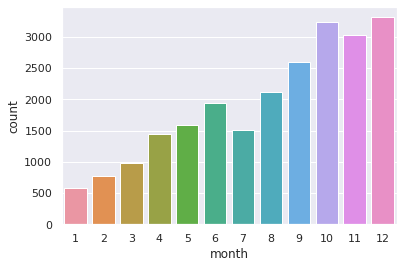

In [162]:
sns.countplot(taxi['month'])

In [163]:
######################################################################################################################

In [164]:
# В какой день недели делают наименьшее число заказов

In [174]:
# Парсим дни недели
weekday_group = taxi.groupby('weekday').agg({'driver_id': 'count'}).reset_index()
weekday = [i for i in weekday_group['weekday']]
weekday

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


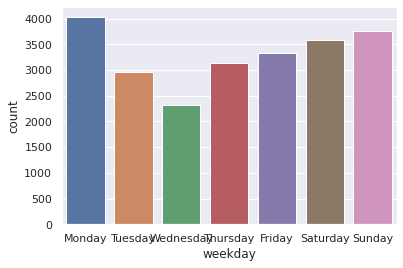

In [176]:
sns.countplot(taxi['weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [177]:
######################################################################################################################

In [178]:
# Посчитать MAU

In [190]:
taxi_mau = []
taxi_mau = taxi.groupby('month').nunique()
taxi_mau

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,weekday,date
month,,,,,,,,,,,,,,,,,,,,,
1,575,102,40,42,2,3,566,490,463,554,...,494,5,513,514,450,5,4,5,7,566
2,770,111,44,45,2,3,741,633,570,746,...,624,6,653,653,581,5,6,6,7,741
3,986,163,48,49,2,3,939,685,660,961,...,727,5,841,841,751,5,6,6,7,939
4,1448,254,51,53,2,3,1359,958,908,1387,...,985,6,1181,1179,1014,5,6,5,7,1359
5,1585,275,56,58,2,3,1478,1110,1034,1525,...,1113,5,1305,1301,1119,5,6,6,7,1478
6,1939,309,55,71,2,3,1752,1241,1120,1833,...,1240,6,1602,1611,1404,5,6,6,7,1752
7,1516,318,57,71,2,3,1433,1077,993,1454,...,1042,6,1316,1314,1182,5,6,6,7,1433
8,2120,377,71,88,3,2,1920,1507,1376,1999,...,1395,6,1761,1755,1567,5,6,5,7,1920
9,2598,416,63,77,3,2,2313,1587,1400,2400,...,1450,5,2093,2083,1897,5,6,6,7,2313


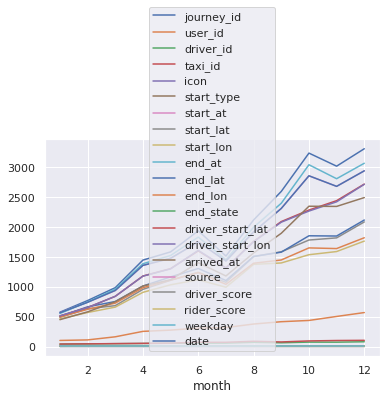

In [189]:
taxi_mau.plot.line()